In [194]:
%matplotlib inline

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
pd.options.display.float_format = '{:.2f}'.format

In [197]:
def plot_data_frame(df):
    x = df.index
    y = df.T.values
    for column, label in zip(y, df.columns):
        plt.plot(x, column, label=label)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend()
    plt.show()

In [198]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [199]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_high

In [200]:
df = pd.read_csv("result.csv"); df

,N,static_points,cycles,records
0,100,1,5,5
1,100,0,8,5
2,100,2,3,4
3,100,0,3,8
4,100,2,9,3
...,...,...,...,...
99995,10000,1,12,13
99996,10000,0,10,10
99997,10000,2,13,6
99998,10000,1,6,14


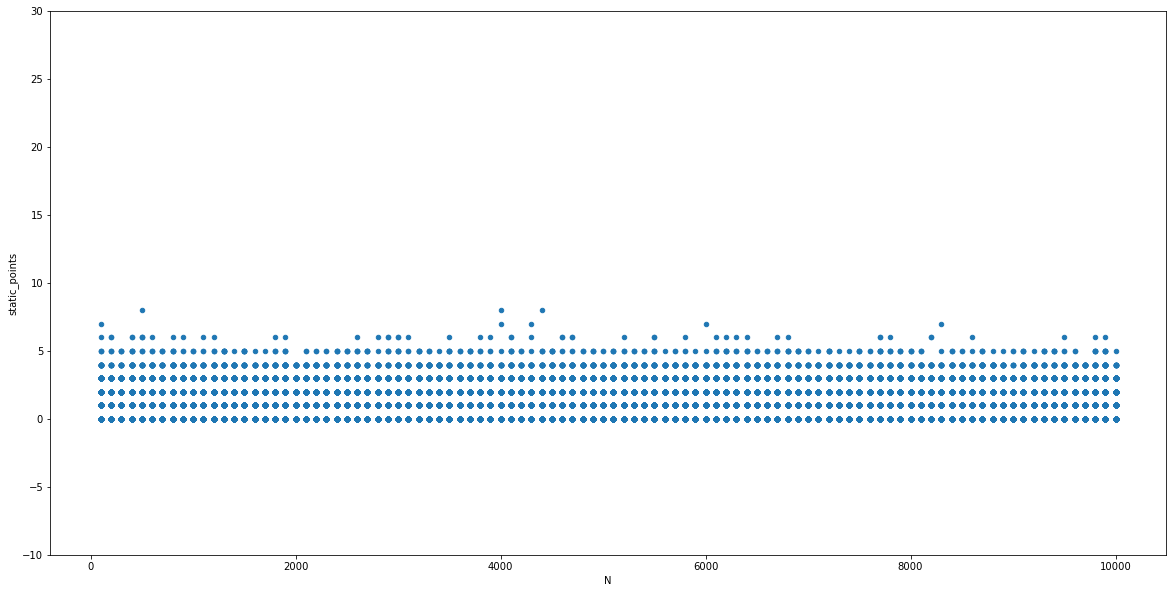

In [217]:
df.plot.scatter(x="N", y="static_points", figsize=(20, 10), ylim=(-10, 30))

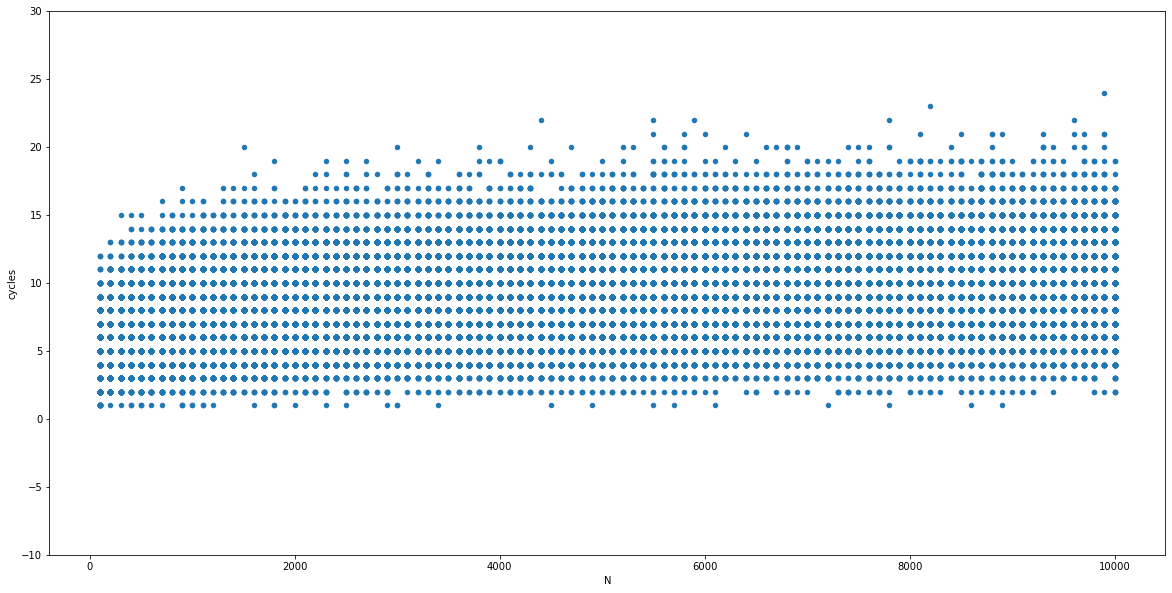

In [209]:
df.plot.scatter(x="N", y="cycles", figsize=(20, 10), ylim=(-10, 30))

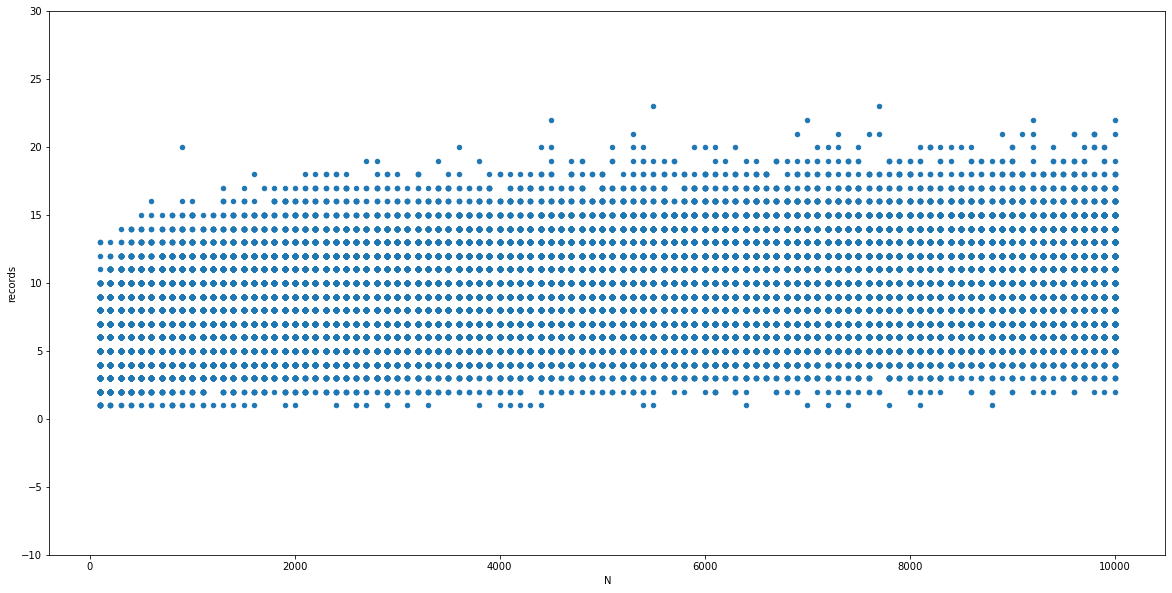

In [207]:
df.plot.scatter(x="N", y="records", figsize=(20, 10), ylim=(-10, 30))

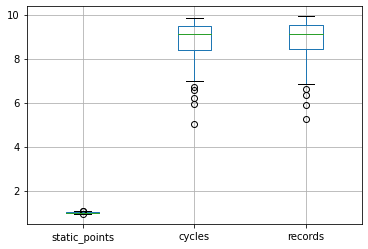

In [202]:
grouped = df.groupby("N")
grouped.mean().boxplot()

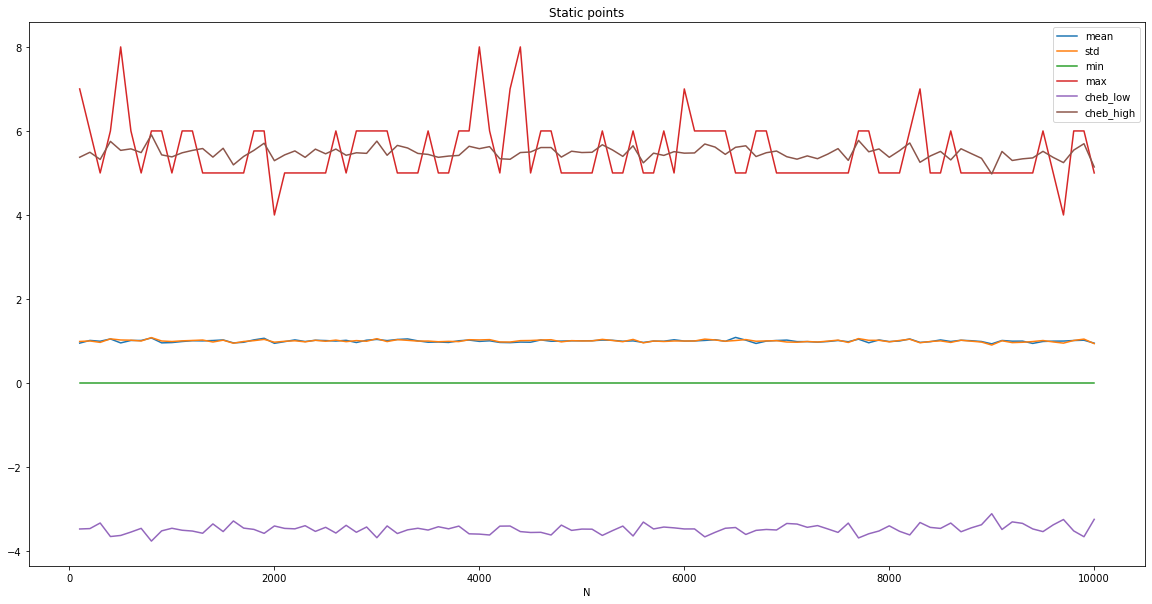

In [203]:
described = grouped["static_points"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Static points", figsize=(20,10))

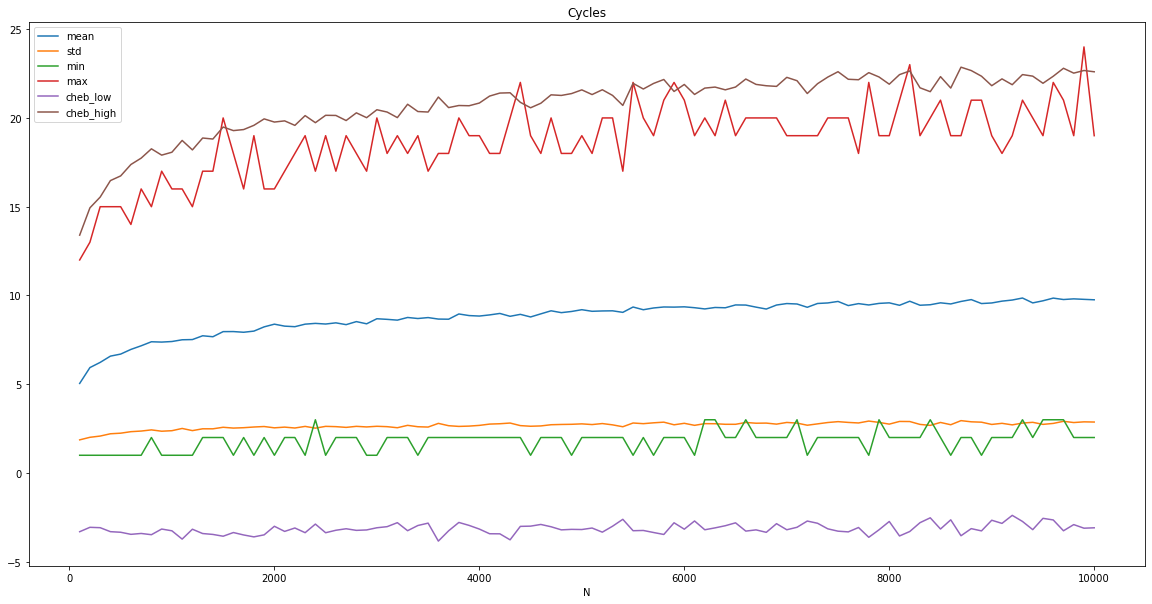

In [204]:
described = grouped["cycles"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Cycles", figsize=(20,10))

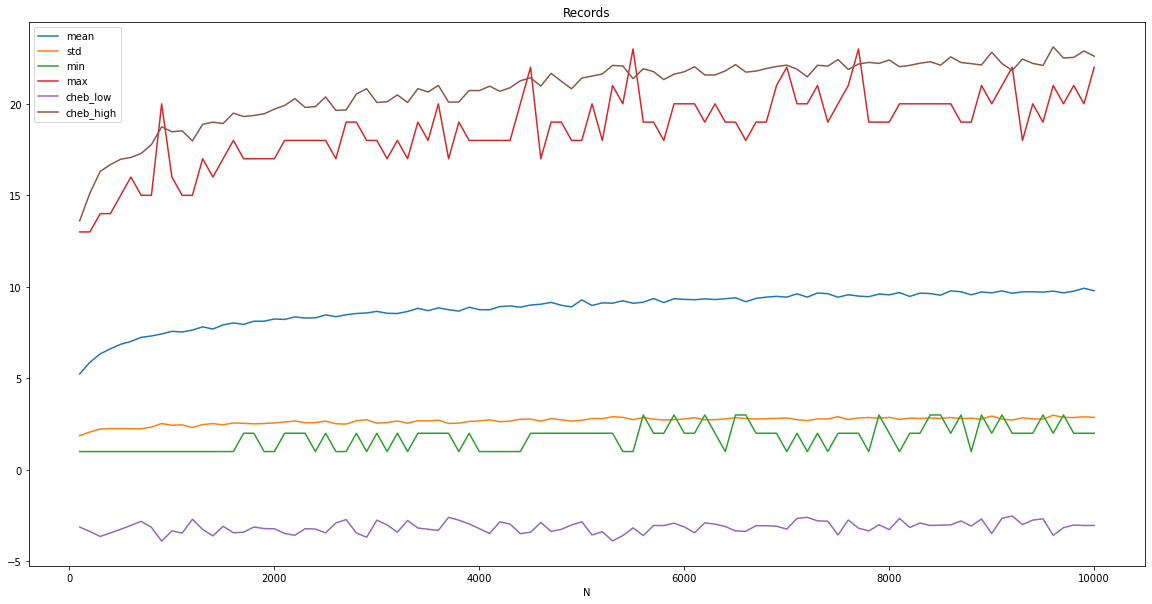

In [205]:
described = grouped["records"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Records", figsize=(20,10))